In [2]:
%%time
from sklearn import tree
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Wall time: 43.1 s


In [3]:
data = pd.DataFrame({'X_1': [1, 1, 1, 0, 0, 0, 0, 1], 
                     'X_2': [0, 0, 0, 1, 0, 0, 0, 1], 
                     'Y': [1, 1, 1, 1, 0, 0, 0, 0]})
data

X_1  X_2  Y
0    1    0  1
1    1    0  1
2    1    0  1
3    0    1  1
4    0    0  0
5    0    0  0
6    0    0  0
7    1    1  0

In [4]:
#Дерево решений
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf

DecisionTreeClassifier(criterion='entropy')

In [5]:
X = data[['X_1','X_2']]
y = data.Y

In [6]:
clf.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [12]:
'''
from IPython.display import SVG
from IPython.display import display
from IPython.display import HTML
from graphviz import Source
style = "<style>svg{width:70% !important;height:70% !important;}</style>"
HTML(style)

#import os
#os.environ["PATH"] += os.pathsep + 'c:\\Python\\Python37\\Lib\\site-packages\\graphviz\\'

graph = Source(tree.export_graphviz(clf, out_file=None,
                                   feature_names=list(X),
                                   class_names=['Negative','Positive'],
                                   filled = True))
display(SVG(graph.pipe(format='svg')))
'''
print("this block is not worked!!!")

this block is not worked!!!


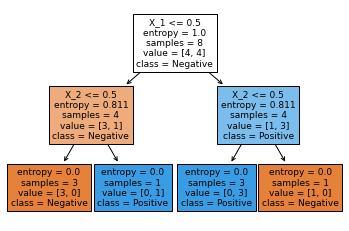

In [8]:
#tree.plot_tree(clf.fit(X,y))
tree.plot_tree(clf, feature_names=list(X), class_names=['Negative', 'Positive'],  filled=True );

In [20]:
import pandas as pd 
cats = pd.read_csv('data/cats.csv')
cats

Unnamed: 0  Шерстист  Гавкает  Лазает по деревьям      Вид
0           0         1        1                   0  собачка
1           1         1        1                   0  собачка
2           2         1        1                   0  собачка
3           3         1        1                   0  собачка
4           4         1        0                   1    котик
5           5         1        0                   1    котик
6           6         1        0                   1    котик
7           7         1        0                   1    котик
8           8         1        1                   1    котик
9           9         0        0                   1    котик

In [21]:
from scipy.stats import entropy

#Энтропия при разделении по фиче Шерстист в группах, где Шерстист 1 составляет
data = cats[cats.Шерстист == 1]
entr = entropy(data.Вид.value_counts() / len(data), base=2)
print(data)
print(data.Вид.value_counts() / len(data))
print("entropy: {}".format(entr))

   Unnamed: 0  Шерстист  Гавкает  Лазает по деревьям      Вид
0           0         1        1                   0  собачка
1           1         1        1                   0  собачка
2           2         1        1                   0  собачка
3           3         1        1                   0  собачка
4           4         1        0                   1    котик
5           5         1        0                   1    котик
6           6         1        0                   1    котик
7           7         1        0                   1    котик
8           8         1        1                   1    котик
котик      0.555556
собачка    0.444444
Name: Вид, dtype: float64
entropy: 0.9910760598382222


In [22]:
from math import log2

E_sh_sob=(1/1)*log2((1/1)) - 0
E_sh_kot=-(4/9)*log2((4/9)) - (5/9)*log2((5/9))
E_gav_sob=0 - (5/5)*log2((5/5))
E_gav_kot=-(4/5)*log2((4/5)) - (1/5)*log2((1/5))
E_laz_sob=0 - (6/6)*log2((6/6))
E_laz_kot=-(4/4)*log2((4/4)) - 0


print("{0:.2f} {1:.2f}".format(E_sh_sob,E_sh_kot))
print("{0:.2f} {1:.2f}".format(E_gav_sob,E_gav_kot))
print("{0:.2f} {1:.2f}".format(E_laz_sob,E_laz_kot))

E = -(4/10)*log2(4/10) - (6/10)*log2(6/10)
print("Entropy S0 = {0:.2f}".format(E))
IG_sh = E - (1/10)*E_sh_sob - (9/10)*E_sh_kot
IG_gav = E - (5/10)*E_gav_sob - (5/10)*E_gav_kot
IG_laz = E - (4/10)*E_laz_sob - (6/10)*E_laz_kot
print("{0:.2f} {1:.2f} {2:.2f}".format(IG_sh,IG_gav,IG_laz))


0.00 0.99
0.00 0.72
0.00 -0.00
Entropy S0 = 0.97
0.08 0.61 0.97


In [23]:
data.Вид.value_counts() / len(data)

котик      0.555556
собачка    0.444444
Name: Вид, dtype: float64

0.9990000000000001